In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal

In [ ]:
# Loading data
benin = pd.read_csv("..\\data\\benin-malanville_clean.csv")
sierraleone = pd.read_csv("..\\data\\sierraleone-bumbuna_clean.csv")
togo = pd.read_csv("..\\data\\togo-dapaong_qr_clean.csv")

In [ ]:
# create new column
benin['Country'] = 'Benin'
sierraleone['Country'] = 'Sierraleone'
togo['Country'] = 'Togo'

In [ ]:
# concatinating datas
df = pd.concat([benin, sierraleone, togo], ignore_index=True)
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,Benin


#### Metrics

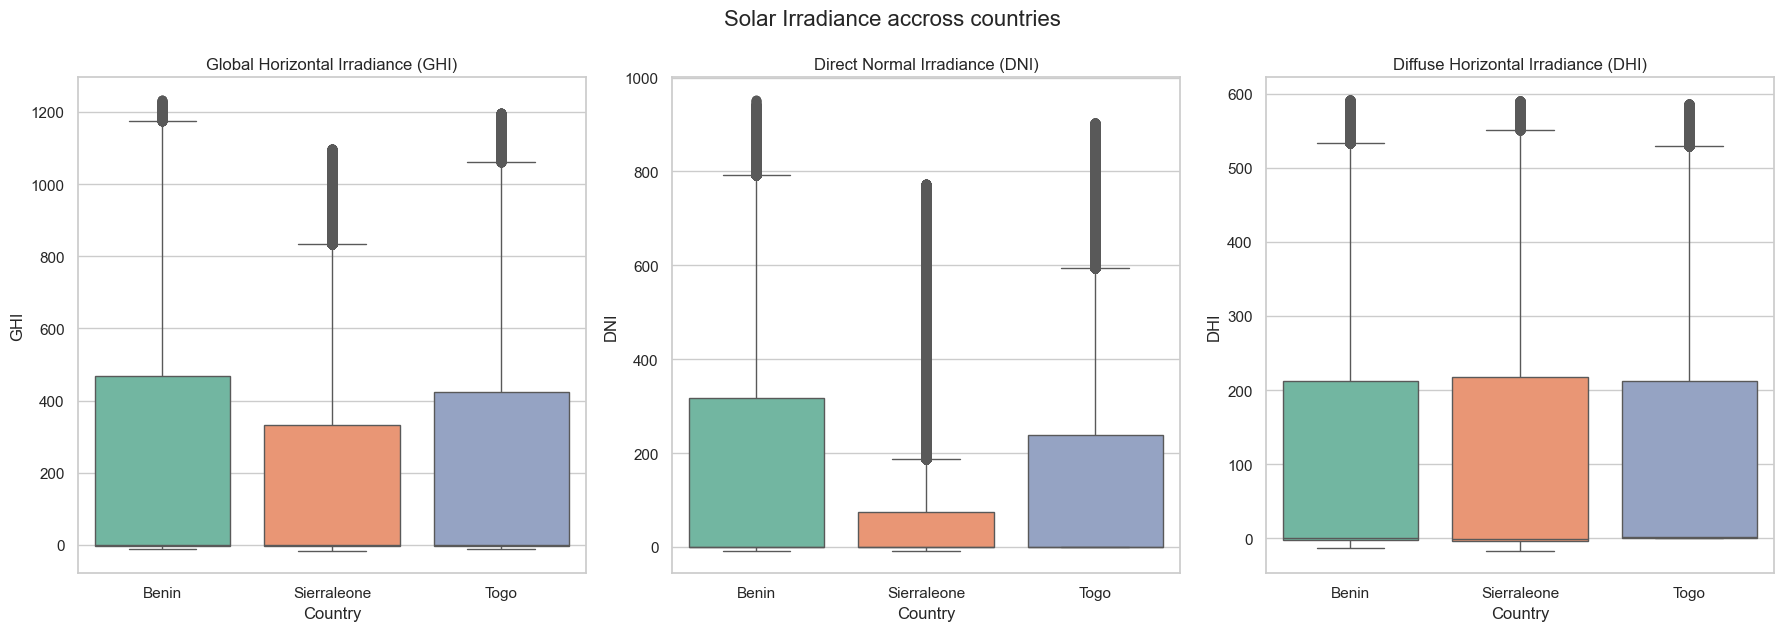

In [8]:
# style
sns.set(style="whitegrid")

# Metrics to plot
metrics = ['GHI', 'DNI', 'DHI']
titles = [
    'Global Horizontal Irradiance (GHI)',
    'Direct Normal Irradiance (DNI)',
    'Diffuse Horizontal Irradiance (DHI)'
]

# subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop through each metric and create boxplot
for i, metric in enumerate(metrics):
    sns.boxplot(
        data=df,
        x='Country',
        y=metric,
        hue='Country',
        palette='Set2',
        legend=False,
        ax=axes[i]
    )
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Country')
    axes[i].set_ylabel(metric)

# Adjust layout
plt.tight_layout()
plt.suptitle('Solar Irradiance accross countries', fontsize=16, y=1.05)
plt.show()

Sierraleone has low DNI relative to other countries

In [9]:
summary = df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
summary.round(2)

GHI                    DNI                    DHI         \
               mean median     std    mean median     std    mean median   
Country                                                                    
Benin        236.23    0.7  328.29  166.90   -0.1  262.08  111.66    0.5   
Sierraleone  185.00   -0.4  279.02  104.13   -0.1  200.95  108.10   -0.6   
Togo         223.86    0.5  317.31  147.98    0.0  247.68  112.78    1.5   

                     
                std  
Country              
Benin        153.10  
Sierraleone  153.69  
Togo         151.57

### 🔍 Key Observations from GHI, DNI, and DHI Summary Table

#### 🇧🇯 Benin
- **Highest mean GHI:** 236.23  
- **Greatest GHI variability:** Std = 328.29  
- 🔆 Indicates large fluctuations in solar irradiance

---

#### 🇹🇬 Togo
- **Most stable DHI median:** 1.5  
- ⚖️ Suggests consistent diffuse solar irradiance  
- Also maintains a **relatively high GHI mean**

---

#### 🇸🇱 Sierra Leone
- **Negative GHI median:** -0.4  
- **Negative DHI median:** -0.6  
- ⚠️ May indicate data quality issues or anomalies

#### Statistical testing

In [ ]:
# functions for automation
def dropna_column(df, column):
    return df[column].dropna()

def perform_anova(column, *dfs):
    data = [df[column].dropna() for df in dfs]
    return f_oneway(*data)

def perform_kruskal(column, *dfs):
    data = [df[column].dropna() for df in dfs]
    return kruskal(*data)

In [ ]:
# listing dataframes
data_frame = [benin, togo, sierraleone]

# drop nan values
ghi_values = [df["GHI"].dropna() for df in data_frame]

# anova
f_stat, p_anova = f_oneway(*ghi_values)
print("One-way ANOVA - F-statistic:", f_stat, "P-value:", p_anova)

# kruskal
h_stat, p_kruskal = kruskal(*ghi_values)
print("Kruskal–Wallis - H-statistic:", h_stat, "P-value:", p_kruskal)

One-way ANOVA - F-statistic: 3833.1842028139195 P-value: 0.0
Kruskal–Wallis - H-statistic: 6548.533789026684 P-value: 0.0


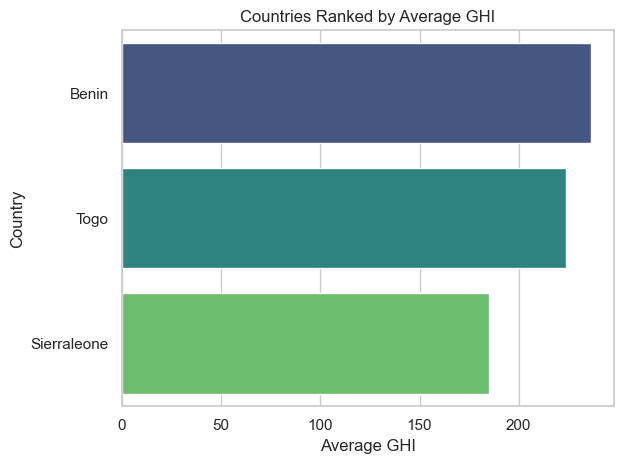

In [13]:
# Calculate average GHI per country
avg_ghi = df.groupby("Country")["GHI"].mean().sort_values(ascending=False).reset_index()

# Plot bar chart with hue and no legend
sns.barplot(data=avg_ghi, x="GHI", y="Country", hue="Country", palette="viridis", legend=False)

plt.xlabel("Average GHI")
plt.ylabel("Country")
plt.title("Countries Ranked by Average GHI")
plt.tight_layout()
plt.show()